In [11]:
# Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

df1 = pd.read_csv('HDI-dataset-clean.csv')
df2 = pd.read_csv('energy.csv')

In [12]:
df2_agg = df2.groupby('country').agg({
    'population': 'last',  # Gemiddelde populatie
    'co2': 'sum',  # Totale CO2-uitstoot
    'co2_per_capita': 'last',  # Gemiddelde CO2-uitstoot per capita
    'energy_per_capita': 'last',  # Gemiddelde energieconsumptie per capita
    'cement_co2': 'sum',  # Totale CO2-uitstoot van cement
    'coal_co2': 'sum',  # Totale CO2-uitstoot van steenkool
    'oil_co2': 'sum',  # Totale CO2-uitstoot van olie
    'gas_co2': 'sum',  # Totale CO2-uitstoot van gas
    'flaring_co2': 'sum',  # Totale CO2-uitstoot van affakkelen
    'share_global_co2': 'last',  # Gemiddeld aandeel van globale CO2-uitstoot
    'temperature_change_from_co2': 'last',  # Gemiddelde temperatuurverandering van CO2
})

In [13]:
# De overeenkomstige landen met verschillende namen in de twee datasets gelijk name geven door middel van mapping en de .replace() functie.
name_mapping = {
    'Hong Kong, China (SAR)': 'Hong Kong',
    'Korea (Republic of)': 'South Korea',
    'Türkiye': 'Turkey',
    'Brunei Darussalam': 'Brunei',
    'Russian Federation': 'Russia',
    'Iran (Islamic Republic of)': 'Iran',
    'Moldova (Republic of)': 'Moldova',
    'Viet Nam': 'Vietnam',
    'Palestine, State of': 'Palestine',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Cabo Verde': 'Cape Verde',
    'Micronesia (Federated States of)': 'Micronesia (country)',
    "Lao People's Democratic Republic": 'Laos',
    'Eswatini (Kingdom of)': 'Eswatini',
    'Timor-Leste': 'East Timor',
    'Syrian Arab Republic': 'Syria',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'Tanzania (United Republic of)': 'Tanzania',
    'Congo (Democratic Republic of the)': 'Democratic Republic of Congo'
}
df1['location'] = df1['location'].replace(name_mapping)

In [28]:
df1_landen = df1['location'].values.tolist()
df2_landen = df2_agg.index.tolist()

overeenkomstige_landen = [x for x in df1_landen if x in df2_landen]
# print(len(overeenkomstige_landen))

# Filteren van de datasets aan de hand van de overeenkomstige_landen lijst zodat de landen in alle datasets voorkomen onder dezelfde naam
df1 = df1[df1['location'].isin(overeenkomstige_landen)]
df2 = df2_agg[df2_agg.index.isin(overeenkomstige_landen)]

In [15]:
def remove_unnamed_columns(df):
    """
    Verwijdert alle kolommen die beginnen met 'Unnamed' uit de gegeven DataFrame.

    Parameters:
        df (pd.DataFrame): De DataFrame waaruit de kolommen verwijderd moeten worden.

    Returns:
        pd.DataFrame: Een DataFrame zonder de 'Unnamed' kolommen.
    """
    # Filter kolommen waarvan de namen beginnen met 'Unnamed'
    columns_to_drop = [col for col in df.columns if col.startswith('Unnamed')]
    
    # Verwijder deze kolommen uit de DataFrame
    df_cleaned = df.drop(columns=columns_to_drop)
    
    return df_cleaned

df1_cleaned = remove_unnamed_columns(df1)

In [16]:
# De drie datasets bij elkaar voegen in een dataset
result_df = pd.merge(df2, df1_cleaned, left_on='country', right_on='location', how='inner')

In [24]:
def remove_outliers(items, df):
    for item in items:
        Q1 = df[item].quantile(0.25)
        Q3 = df[item].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[item] < lower) | (df[item] > upper)].index
        
        # Drop outliers
        df.drop(outliers, inplace=True)
        
    return df
df_result = remove_outliers(['Expected years of schooling', 'co2_per_capita', 'Mean years of schooling'], result_df)
result_df.to_csv('data.csv')

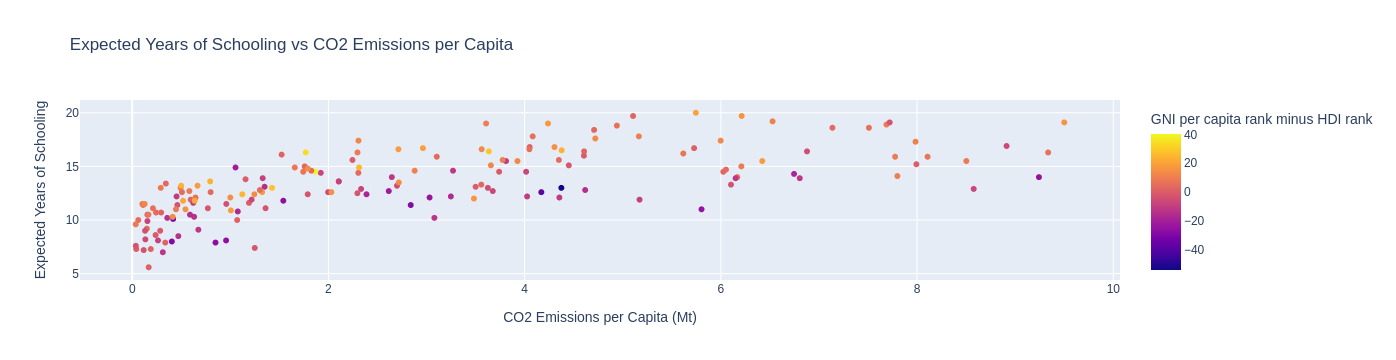

In [27]:

# Maak een scatter plot met Plotly
fig = px.scatter(df_result, x='co2_per_capita', y='Expected years of schooling',
                 color='GNI per capita rank minus HDI rank', hover_name='location',
                 title='Expected Years of Schooling vs CO2 Emissions per Capita',
                 labels={
                     'co2_per_capita': 'CO2 Emissions per Capita (Mt)',
                     'Expected years of schooling': 'Expected Years of Schooling',
                     'GNI per capita rank minus HDI rank': 'GNI per capita rank minus HDI rank'
                 })

# Toon de plot
fig.show()